### Only downloading for smaller selection of events as chosen in make_smaller_selection_to_pick.ipynb

In [1]:
from obspy.core import Stream, UTCDateTime
from obspy.clients.fdsn import Client
import numpy as np
import pandas as pd
import os.path
import os

In [5]:
client = Client('IRIS')

selected_catalog = np.load('/Users/sydneydybing/StrainProject/2024/NA_evt-sta_dist_array_less500km_withdata.npy')
earthquakes = selected_catalog[:,0]
origin_times = selected_catalog[:,1]
stas = selected_catalog[:,5]

# Array order:

# 0. Earthquake identifier
# 1. Earthquake origin time
# 2. Earthquake latitude
# 3. Earthquake longitude
# 4. Earthquake magnitude
# 5. Station name
# 6. Station latitude
# 7. Station longitude
# 8. Hypocentral distance

In [6]:
i = np.where((earthquakes == '2019-12-23T20_M6') | (earthquakes == '2019-12-23T19_M6') | (earthquakes == '2018-10-22T06_M6.5') | (earthquakes == '2018-10-22T05_M6.5'))[0]

fix_dups = False
if fix_dups:
    earthquakes = earthquakes[i]
    origin_times = origin_times[i]
    stas = stas[i]

B017


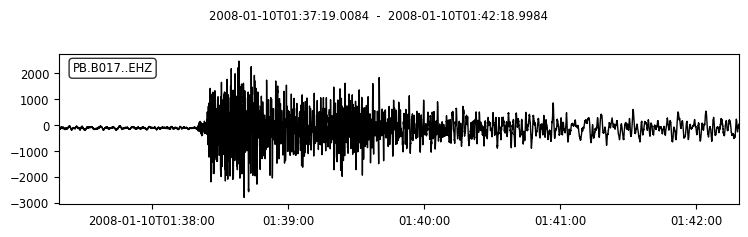

B018
B022
B026


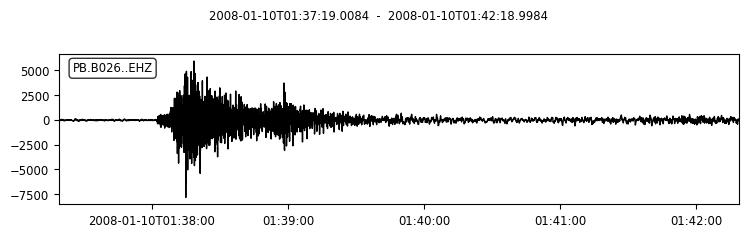

B027
B028
B030
B031
B033
B035


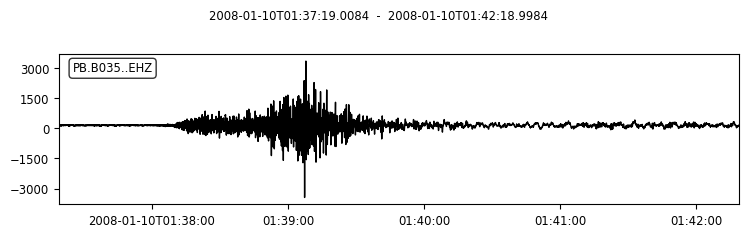

B039


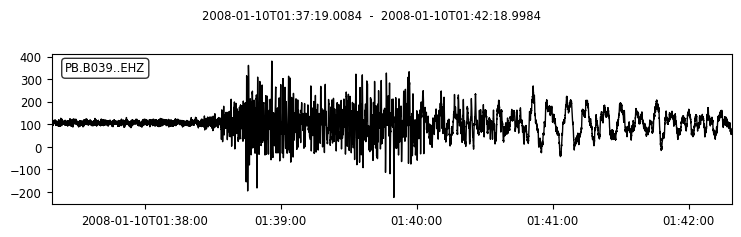

B040


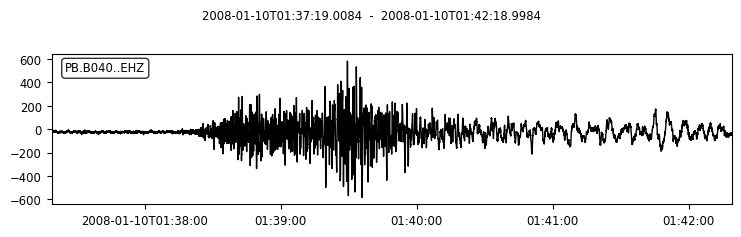

In [8]:
for idx in range(len(earthquakes)):

    # print('Row ' + str(idx+1) + '/' + str(len(earthquakes)))

    eq_id = earthquakes[idx] 
    # if eq_id == '2008-01-10_M6.3':
    #     pass
    # else:
    #     continue
    sta = stas[idx]
    # print(sta)

    ot = origin_times[idx]
    stime = UTCDateTime(ot)
    etime = stime + 5.*60.
    
    net = 'PB'
    loc = '*'
    chan = 'EHZ'

    try:

        st = client.get_waveforms(net, sta, loc, chan, stime, etime)
        # st.plot()

        # Create folder for the event
        eq_sta_save_dir = '/Users/sydneydybing/StrainProject/2024/seismic_data/raw/' + str(eq_id) + '/' + str(sta) + '/'
#         print(eq_sta_save_dir)
        if os.path.isdir(eq_sta_save_dir):
            pass
        else:
            os.makedirs(eq_sta_save_dir)

        st.write(eq_sta_save_dir + chan + '.mseed', format = 'MSEED')

    except:
        pass
#                 print(idx, sta, chan, "not found")

In [11]:
k = np.where(selected_catalog[:,0] == '2023-04-13_M6')[0]
d = np.where(selected_catalog[k,5] == 'B014')[0]

print(selected_catalog[d][0])

ot = selected_catalog[d][0][1]
stime = UTCDateTime(ot)
etime = stime + 5.*60.

net = 'PB'
loc = '*'
chan = 'EHZ'
sta = 'B014'

st = client.get_waveforms(net, sta, loc, chan, stime, etime)
st.plot()

['2023-04-13_M6' '2023-04-13T15:54:53.808Z' '49.215' '-129.6178' '6.0'
 'B014' '47.5133' '-123.8125' '469.780896058']


FDSNNoDataException: No data available for request.
Detailed response of server:

